In [1]:
# !pip install autoviz

In [35]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df= pd.read_csv("/content/Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

first we drop three columns which is RowNumber, CustomerId and Surname this columns are not use full.

In [8]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**data analysis**

Number of people that are exited 2037 , ( 20.369999999999997 %)
Number of people that are exited 7963 , ( 79.63 %)


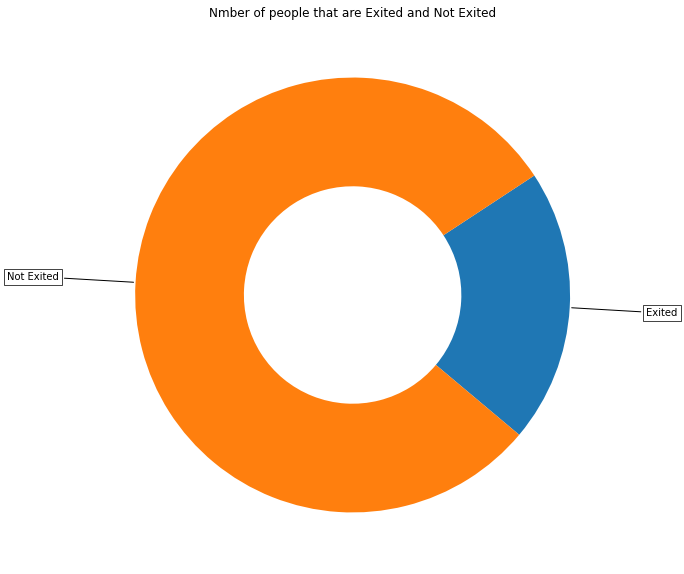

In [10]:
y_value_counts = df['Exited'].value_counts()
print("Number of people that are exited", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of people that are exited", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
recipe = ["Exited", "Not Exited"]
data = [y_value_counts[1], y_value_counts[0]]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)
ax.set_title("Nmber of people that are Exited and Not Exited")
plt.show()

**Check for null**

In [11]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Data Model Ready: encoding numerical, categorical features**

In [12]:
geography=pd.get_dummies(df['Geography'])
gender=pd.get_dummies(df['Gender'])

In [13]:
finalDataFrame=pd.concat([df,geography,gender],axis=1)

In [14]:
finalDataFrame=finalDataFrame.drop(['Gender','Geography'],axis=1)

**split the data in train and test**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
finalDataFrame.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'France', 'Germany',
       'Spain', 'Female', 'Male'],
      dtype='object')

In [17]:
data=finalDataFrame.iloc[:,[0,1,2,4,5,6,7,9,10,11,12,13]]
target=finalDataFrame.iloc[:,[8]]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data,target , stratify=target , test_size=0.3) # this is random splitting

In [19]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7000, 12) (7000, 1)
(3000, 12) (3000, 1)


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
prepro=StandardScaler()
X_train=prepro.fit_transform(X_train)
X_test=prepro.transform(X_test)

**Models one**

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [23]:
#create a function for auc and roc curve 
#it give all the matrix and classification_report
def report(y_test,y_pred):
    # null_accuracy = y_test.value_counts()[0]/len(y_test)
    # print(f"Null Accuracy: {null_accuracy*100:.4f}%")
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TN = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TP = matrix[1,1]
    accuracy_score=(TN+TP) / float(TP+TN+FP+FN)
    recall_score = (TP)/ float(TP+FN)
    specificity = TN / float(TN+FP)
    FPR = FP / float(FP+TN)
    precision_score = TP / float(TP+FP)
    print(f"Accuracy Score: {accuracy_score*100:.4f}%")
    print(f"Recall Score: {recall_score*100:.4f}%")
    print(f"Specificity Score: {specificity*100:.4f}%")
    print(f"False Positive Rate: {FPR*100:.4f}%")
    print(f"Precision Score: {precision_score*100:.4f}%")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Classification Report")
    print(classification_report(y_test,y_pred))    

In [42]:
classifier=Sequential()
classifier.add(Dense(units = 6, kernel_initializer='he_uniform',activation='relu',input_dim =X_train.shape[1]))
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10,epochs=100)

Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 0.8680 - accuracy: 0.4555 - val_loss: 0.6294 - val_accuracy: 0.6850
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.6034 - accuracy: 0.7220 - val_loss: 0.5448 - val_accuracy: 0.7711
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5532 - accuracy: 0.7671 - val_loss: 0.5099 - val_accuracy: 0.7858
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4849 - accuracy: 0.8011 - val_loss: 0.4921 - val_accuracy: 0.7910
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5000 - accuracy: 0.7796 - val_loss: 0.4808 - val_accuracy: 0.7927
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4825 - accuracy: 0.7864 - val_loss: 0.4720 - val_accuracy: 0.7936
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4709 - accuracy: 0.7966 - val_loss: 0.4648 - val_accuracy: 0.7953

In [28]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


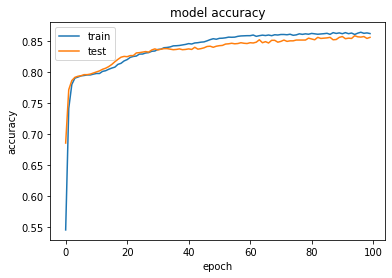

In [29]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

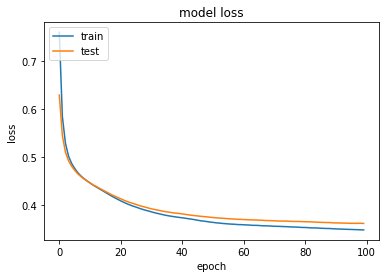

In [30]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
report(y_test, y_pred)

Confusion Matrix
[[2303   86]
 [ 359  252]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 85.1667%
Recall Score: 41.2439%
Specificity Score: 96.4002%
False Positive Rate: 3.5998%
Precision Score: 74.5562%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2389
           1       0.75      0.41      0.53       611

    accuracy                           0.85      3000
   macro avg       0.81      0.69      0.72      3000
weighted avg       0.84      0.85      0.83      3000



In [40]:
from sklearn.metrics import roc_curve,auc

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Text(0.5, 0, 'False Positive Rate')

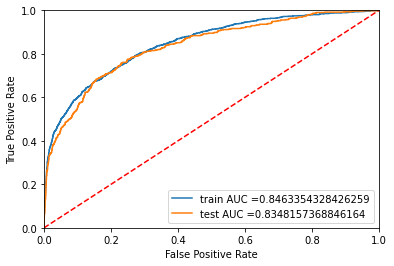

In [41]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, classifier.predict_proba(X_train))
test_fpr, test_tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

**Model 2**

In [45]:
classifier2=Sequential()
classifier2.add(Dense(units = 128, kernel_initializer='he_uniform',activation='relu',input_dim =X_train.shape[1]))
classifier2.add(Dropout(0.25))
classifier2.add(Dense(units=64,kernel_initializer='he_uniform',activation='relu'))
classifier2.add(Dropout(0.2))
classifier2.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
classifier2.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               1664      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 12,033
Trainable params: 12,033
Non-trainable params: 0
__________________________________________________

In [48]:
# Compiling the ANN
classifier2.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
model_history2=classifier2.fit(X_train, y_train,validation_split=0.33, batch_size = 10,epochs=200)

Epoch 1/200
469/469 [==============================] - 2s 2ms/step - loss: 0.5553 - accuracy: 0.7573 - val_loss: 0.4054 - val_accuracy: 0.8347
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 0.4344 - accuracy: 0.8258 - val_loss: 0.4090 - val_accuracy: 0.8386
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 0.4150 - accuracy: 0.8332 - val_loss: 0.3801 - val_accuracy: 0.8421
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 0.3999 - accuracy: 0.8417 - val_loss: 0.3628 - val_accuracy: 0.8490
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 0.3874 - accuracy: 0.8424 - val_loss: 0.3658 - val_accuracy: 0.8559
Epoch 6/200
469/469 [==============================] - 1s 2ms/step - loss: 0.3686 - accuracy: 0.8520 - val_loss: 0.3625 - val_accuracy: 0.8537
Epoch 7/200
469/469 [==============================] - 1s 2ms/step - loss: 0.3567 - accuracy: 0.8615 - val_loss: 0.3646 - val_accuracy: 0.8524

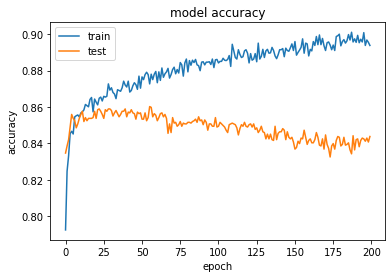

In [49]:
# summarize history for accuracy
plt.plot(model_history2.history['accuracy'])
plt.plot(model_history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

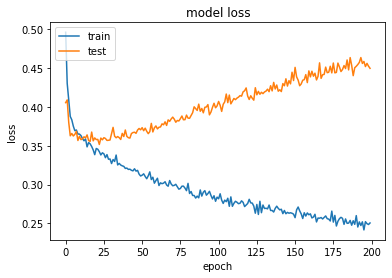

In [50]:
# summarize history for loss
plt.plot(model_history2.history['loss'])
plt.plot(model_history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
y_pred = classifier2.predict(X_test)
y_pred = (y_pred > 0.5)
report(y_test, y_pred)

Confusion Matrix
[[2279  110]
 [ 356  255]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 84.4667%
Recall Score: 41.7349%
Specificity Score: 95.3956%
False Positive Rate: 4.6044%
Precision Score: 69.8630%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      2389
           1       0.70      0.42      0.52       611

    accuracy                           0.84      3000
   macro avg       0.78      0.69      0.71      3000
weighted avg       0.83      0.84      0.83      3000



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Text(0.5, 0, 'False Positive Rate')

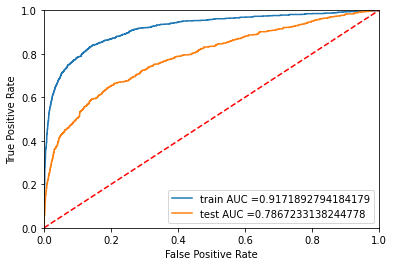

In [52]:

train_fpr, train_tpr, thresholds = roc_curve(y_train, classifier2.predict_proba(X_train))
test_fpr, test_tpr, thresholds = roc_curve(y_test, classifier2.predict_proba(X_test))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

**Model 3**

In [86]:
classifier3=Sequential()
classifier3.add(Dense(units = 15, kernel_initializer='he_uniform',activation='relu',input_dim =X_train.shape[1]))
# classifier2.add(Dropout(0.10))
classifier3.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))
# # classifier2.add(Dropout(0.10))
classifier3.add(Dense(units=5,kernel_initializer='he_uniform',activation='relu'))
# classifier3.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
# # classifier2.add(Dropout(0.10))
# classifier3.add(Dense(units=16,kernel_initializer='he_uniform',activation='relu'))
classifier3.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier3.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 15)                195       
_________________________________________________________________
dense_59 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_60 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 6         
Total params: 416
Trainable params: 416
Non-trainable params: 0
_________________________________________________________________


In [89]:
# Compiling the ANN
callback =keras.callbacks.EarlyStopping(monitor='loss', patience=5)
classifier3.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
#validation_split=0.22,
model_history3=classifier3.fit(X_train, y_train, batch_size = 10,epochs=300)

Epoch 1/300
700/700 [==============================] - 1s 1ms/step - loss: 0.3226 - accuracy: 0.8693
Epoch 2/300
700/700 [==============================] - 1s 1ms/step - loss: 0.3099 - accuracy: 0.8736
Epoch 3/300
700/700 [==============================] - 1s 1ms/step - loss: 0.3267 - accuracy: 0.8721
Epoch 4/300
700/700 [==============================] - 1s 1ms/step - loss: 0.3196 - accuracy: 0.8724
Epoch 5/300
700/700 [==============================] - 1s 1ms/step - loss: 0.3149 - accuracy: 0.8727
Epoch 6/300
700/700 [==============================] - 1s 1ms/step - loss: 0.3139 - accuracy: 0.8769
Epoch 7/300
700/700 [==============================] - 1s 1ms/step - loss: 0.3071 - accuracy: 0.8758
Epoch 8/300
700/700 [==============================] - 1s 1ms/step - loss: 0.3127 - accuracy: 0.8748
Epoch 9/300
700/700 [==============================] - 1s 1ms/step - loss: 0.3094 - accuracy: 0.8796
Epoch 10/300
700/700 [==============================] - 1s 1ms/step - loss: 0.3073 - accura

Confusion Matrix
[[2283  106]
 [ 359  252]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 84.5000%
Recall Score: 41.2439%
Specificity Score: 95.5630%
False Positive Rate: 4.4370%
Precision Score: 70.3911%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2389
           1       0.70      0.41      0.52       611

    accuracy                           0.84      3000
   macro avg       0.78      0.68      0.71      3000
weighted avg       0.83      0.84      0.83      3000



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Text(0.5, 0, 'False Positive Rate')

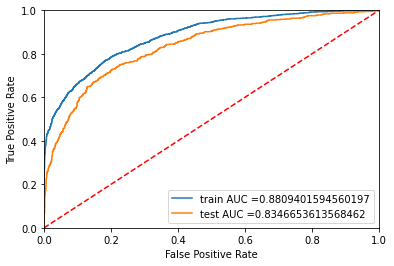

In [90]:
y_pred = classifier3.predict(X_test)
y_pred = (y_pred > 0.5)
report(y_test, y_pred)
train_fpr, train_tpr, thresholds = roc_curve(y_train, classifier3.predict_proba(X_train))
test_fpr, test_tpr, thresholds = roc_curve(y_test, classifier3.predict_proba(X_test))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
# y_pred = classifier.predict(X_test)
# y_pred = (y_pred > 0.5)
# train_fpr, train_tpr, thresholds = roc_curve(y_train, y_pred[:,1])#it give diffrante threshold and tpr,fpr on train data
# test_fpr, test_tpr, thresholds = roc_curve(y_test, y_pred[:,1])#it give diffrante threshold and tpr,fpr on test data
# # #plot the auc and roc
# # plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
# # plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))

In [ ]:
# train_fpr, train_tpr, thresholds = roc_curve(y_train, classifier.predict_proba(X_train))
